# 4. FeedForward

512개 벡터값에 가중치를 곱하고 편차를 더한 값들을 만드는 과정</br> ReLU 함수를 통과하는 구간이 있으므로 (xW1 + b1) 값이 음수인 경우 0으로 대체된다. </br>input과 ouput의 크기는 512이고, 중간 층은 2048의 층을 지난다. 

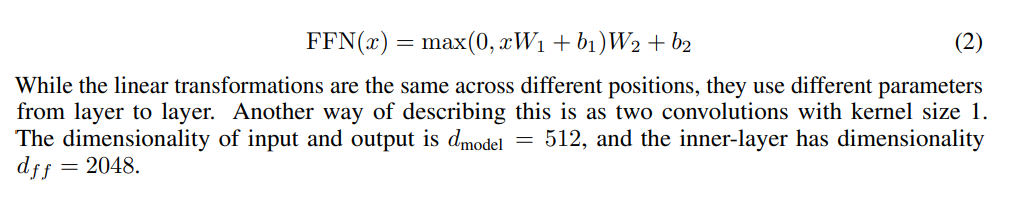

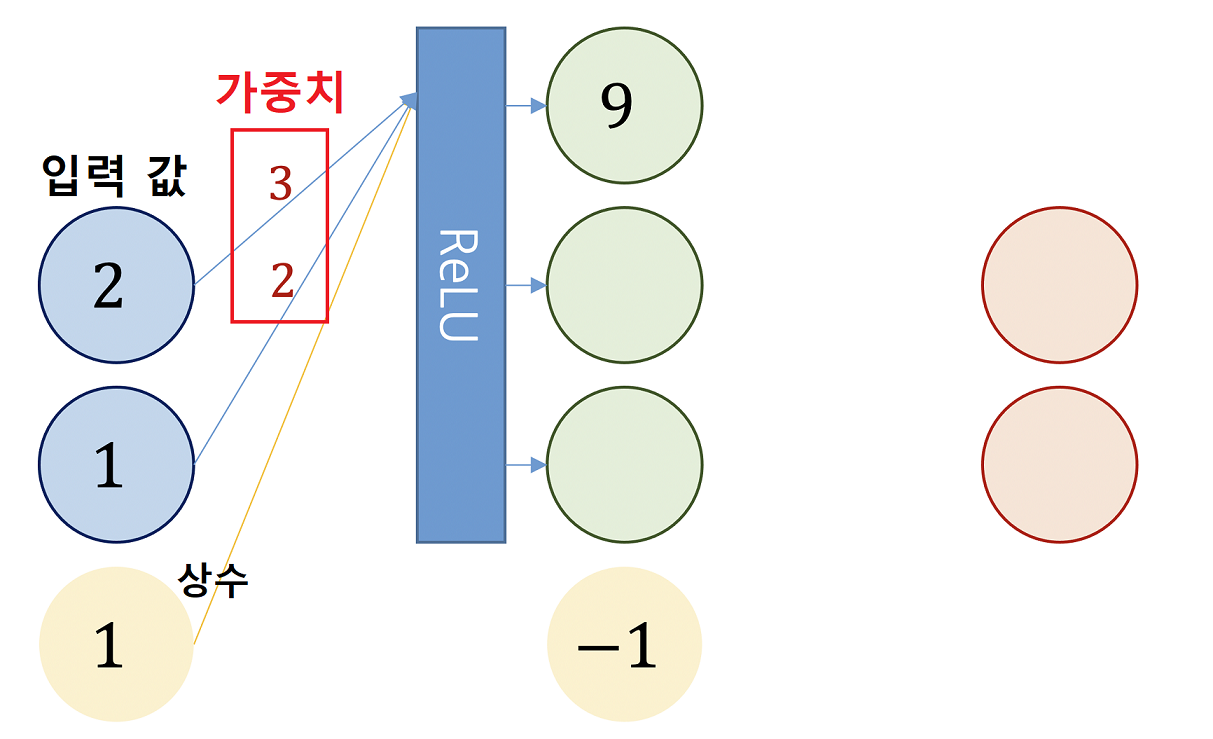

In [ ]:
# class PoswiseFeedForwardNet(nn.Module):
#     def __init__(self):
#         super().__init__()

#         hidden_size = 512
#         # Another way of describing this is as two convolutions with kernel size 1
#         self.conv1 = nn.Conv1d(in_channels=hidden_size, out_channels=hidden_size * 4, kernel_size=1)
#         self.conv2 = nn.Conv1d(in_channels=hidden_size * 4, out_channels=hidden_size, kernel_size=1)

#     def forward(self, inputs):
#         output = F.relu(self.conv1(inputs.transpose(1, 2)))
#         output = self.conv2(output).transpose(1, 2)
#         return output

In [ ]:
class PoswiseFeedForwardNet(nn.Module):
    def __init__(self):
        super().__init__()

        hidden_size = 512
        inner_dim = 2048
        self.linear1 = nn.Linear(hidden_size, inner_dim)
        self.linear2 = nn.Linear(inner_dim, hidden_size)

    def forward(self, inputs):
        output = F.relu(self.linear1(inputs))
 #       print(list(self.linear1.parameters()))
        output = self.linear2(output)
        return output

In [ ]:
ff = PoswiseFeedForwardNet()

In [ ]:
print(ff(ma(Q, K, V, attention_mask)[0])[0], ff(ma(Q, K, V, attention_mask)[0]).size())

tensor([[ 0.0633, -0.1072, -0.0761,  ...,  0.0715, -0.0548,  0.0308],
        [ 0.0905, -0.0509, -0.1374,  ...,  0.0294, -0.0124,  0.1273],
        [ 0.1702, -0.0504, -0.1323,  ..., -0.0358, -0.0201,  0.0640],
        ...,
        [ 0.1032, -0.0488, -0.0203,  ...,  0.0899, -0.0687,  0.0693],
        [ 0.0778, -0.1367, -0.1420,  ...,  0.0821, -0.0178,  0.0917],
        [ 0.0937, -0.1224, -0.0480,  ...,  0.0487, -0.0339,  0.1222]],
       grad_fn=<SelectBackward0>) torch.Size([2, 9, 512])
